# Introduction to Time-Series Analysis with Python
This notebook provides examples of Python code to illustrate key concepts in time-series analysis. 
Each section of code corresponds to topics covered in the lecture, and ample comments are provided 
to ensure that you understand each line of code.


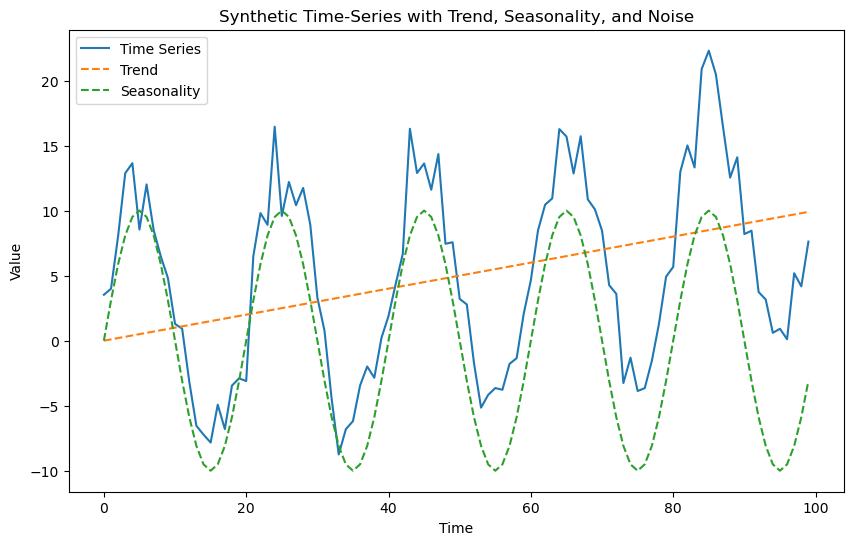

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Create a time index from 0 to 99
time = np.arange(100)

# Generate a linear trend
trend = 0.1 * time

# Generate a seasonal component with a period of 20
seasonal = 10 * np.sin(2 * np.pi * time / 20)

# Generate some random noise
noise = np.random.normal(scale=2, size=100)

# Combine these components to form the time series
series = trend + seasonal + noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time, series, label='Time Series')
plt.plot(time, trend, '--', label='Trend')
plt.plot(time, seasonal, '--', label='Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time-Series with Trend, Seasonality, and Noise')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

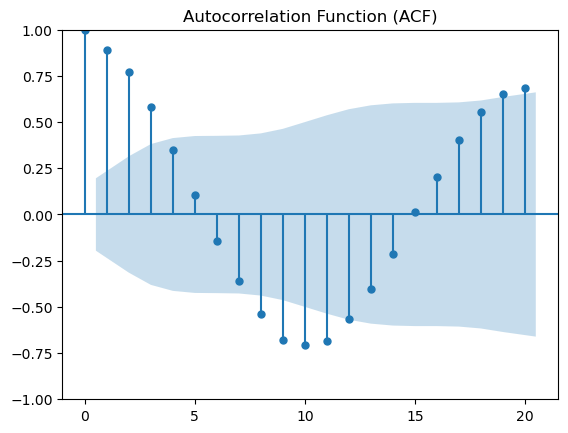

In [2]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the Autocorrelation Function (ACF) for the time series
plt.figure(figsize=(10, 6))
plot_acf(series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()


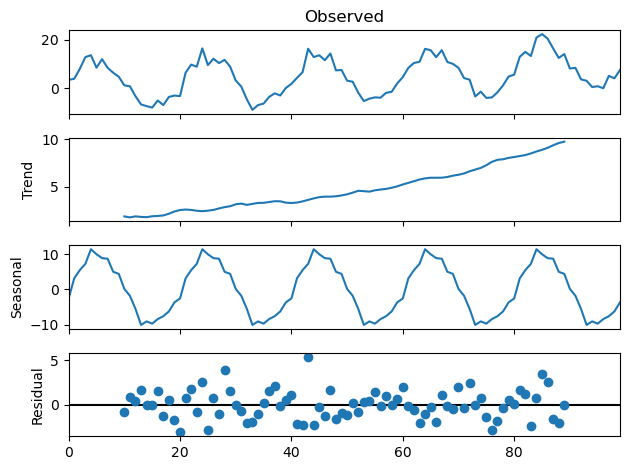

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition of the time series
result = seasonal_decompose(series, model='additive', period=20)

# Plot the decomposed components
result.plot()
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(series)

# Output the ADF statistic and p-value
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -0.5303745920667896
p-value: 0.8859515709418133


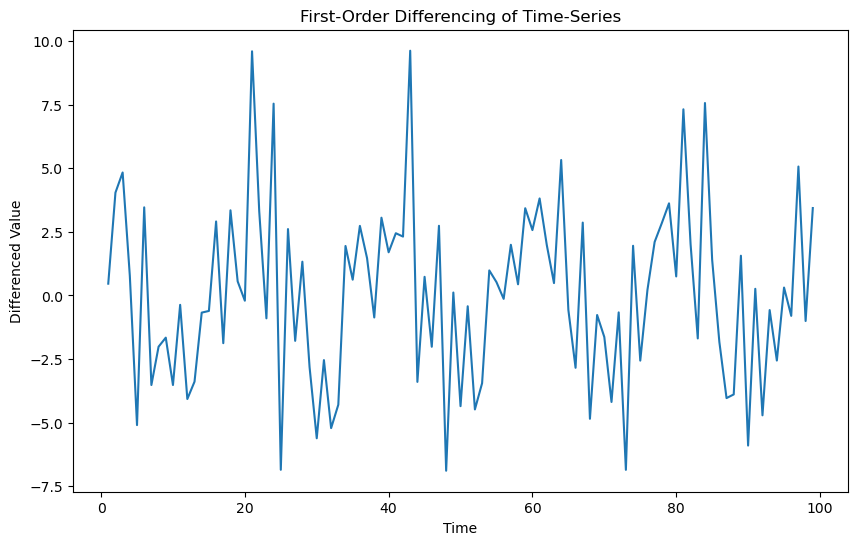

In [5]:
# Perform first-order differencing to remove trend and achieve stationarity
diff_series = np.diff(series, n=1)

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(time[1:], diff_series)
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.title('First-Order Differencing of Time-Series')
plt.show()


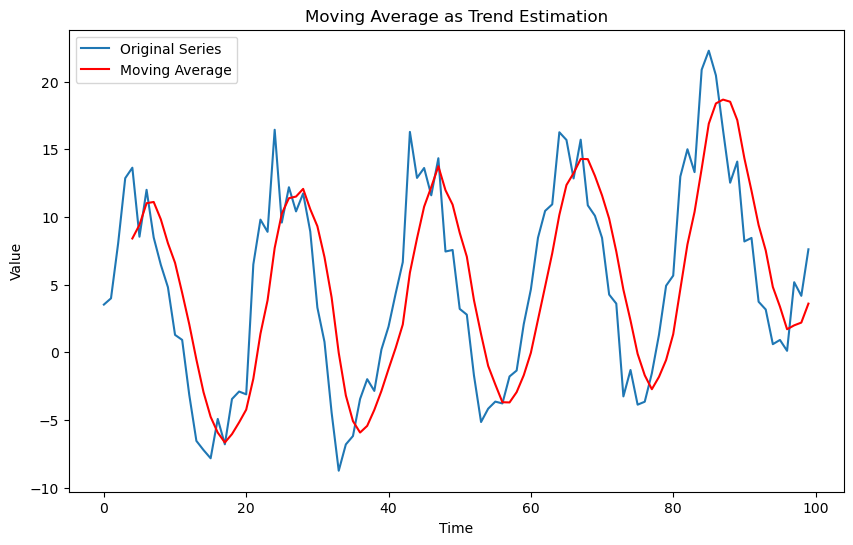

In [6]:
# Calculate a moving average with a window of 5 to estimate the trend
window = 5
moving_avg = np.convolve(series, np.ones(window)/window, mode='valid')

# Plot the original series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(time, series, label='Original Series')
plt.plot(time[window-1:], moving_avg, label='Moving Average', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Moving Average as Trend Estimation')
plt.legend()
plt.show()
